## Introduction to Persistent Homology using `scikit-tda`

Notebook written by Álvaro Torras Casas, Cardiff University, Michaelmass 2022

This notebook uses many ideas and code original or paraphrased from the `scikit-tda`documentation, so there is no claims of originality.

We will be using the `scikit-tda` library through this notebook. The documentation for this library can be found on the following link: 

https://scikit-tda.org/

<img src=https://scikit-tda.org/_static/logo.png width="150">

Through this notebook we will be using some original images from the `scikit-tda` library.


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import timeit

import tadasets

### Data Examples with `tadasets.py`

<img src=https://scikit-tda.org/_images/tadasets.png width="120"> 

In this notebook, we will review some of the common filtered complexes used in TDA. 

Let us get some sample points about a swiss roll

In [2]:
infty_pts = tadasets.infty_sign(30, noise=0.05)

**Tips:** The python `help()` command is useful when we are unsure of what a function does. Also, pressing the tab key after typing `tadasets.` gives us the different functions and classes of the `tadasets.py` module. 

In [3]:
help(tadasets.infty_sign)

Help on function infty_sign in module tadasets.shapes:

infty_sign(n=100, noise=None)
    Construct a figure 8 or infinity sign with :code:`n` points and noise level with :code:`noise` standard deviation.
    
    Parameters
    
    n: int
        number of points in returned data set.
    noise: float
        standard deviation of normally distributed noise added to data.



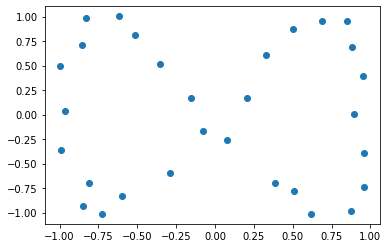

In [4]:
plt.scatter(infty_pts[:,0], infty_pts[:,1])

In [5]:
torus_pts = tadasets.torus(300)

<Axes3DSubplot:>

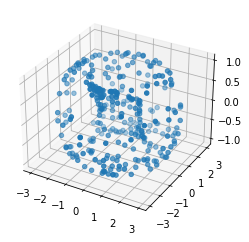

In [6]:
tadasets.view.plot3d(torus_pts)

### Compute Cech complexes


`Cechmate` is an interface for the PHAT C++ module: https://github.com/blazs/phat

https://cechmate.scikit-tda.org/en/latest/notebooks/BasicUsage.html

<img src=https://scikit-tda.org/_images/cechmate.png width=120>

In [7]:
import cechmate as cm

In [8]:
help(cm.Cech)

Help on class Cech in module cechmate.filtrations.cech:

class Cech(cechmate.filtrations.base.BaseFiltration)
 |  Cech(maxdim=None, verbose=True)
 |  
 |  Compute the Cech filtration of a Euclidean point set for simplices up to order :code:`self.max_dim`.
 |  
 |  Examples
 |  ========
 |  
 |      >>> r = Cech(maxdim=1)
 |      >>> simplices = r.build(X)
 |      >>> diagrams = r.diagrams(simplices)
 |  
 |  Method resolution order:
 |      Cech
 |      cechmate.filtrations.base.BaseFiltration
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  build(self, X)
 |      Compute the Cech filtration of a Euclidean point set for simplices up to order :code:`self.max_dim`.
 |      
 |      Parameters
 |      ===========
 |      
 |      X: Nxd array
 |          N Euclidean vectors in d dimensions
 |      
 |      Returns
 |      ==========
 |      
 |      simplices: 
 |          Cech filtration for the data X
 |  
 |  --------------------------------------------------------------

In [18]:
cech_1 = cm.Cech(maxdim=1)
cech_1

In [19]:
infty_cpx = cech_1.build(infty_pts)

Diagram plotting using `Persim`

<img src=https://persim.scikit-tda.org/en/latest/_static/logo.png width=120>

https://persim.scikit-tda.org/en/latest/

In [23]:
from persim import plot_diagrams
import matplotlib.pyplot as plt

In [39]:
cechdgms = cech_1.diagrams(infty_cpx)

Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.209)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.0337)


In [40]:
N = 40
M = 50
infty_cpx[N:M] # print simplices between N < M from the Cech filtration

[([0, 11], 0.9547025649677902),
 ([0, 12], 0.9895752124732564),
 ([0, 13], 0.9218474258426617),
 ([0, 14], 0.9596029566929001),
 ([0, 15], 0.9305189790300016),
 ([0, 16], 0.9778303774970424),
 ([0, 17], 0.9449044777655587),
 ([0, 18], 0.9944700299704525),
 ([0, 19], 0.9064707800580208),
 ([0, 20], 0.8146190161446669)]

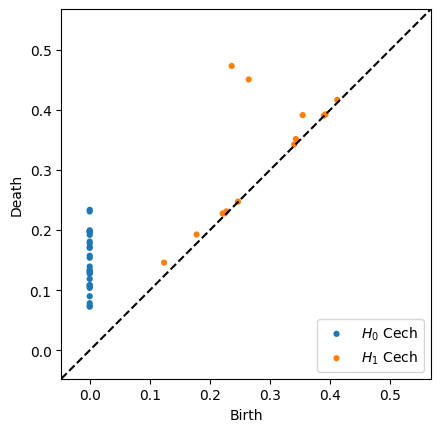

In [41]:
plot_diagrams(cechdgms, labels = ['$H_0$ Cech', '$H_1$ Cech'])
plt.show()

### Compute Vietoris-Rips complexes

Next, let us use `Ripser`to compute the persistent homology associated to Vietoris-Rips complexes

<img src=https://scikit-tda.org/_images/ripser.png width=120>

https://github.com/scikit-tda/ripser.py

In [33]:
from ripser import Rips

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


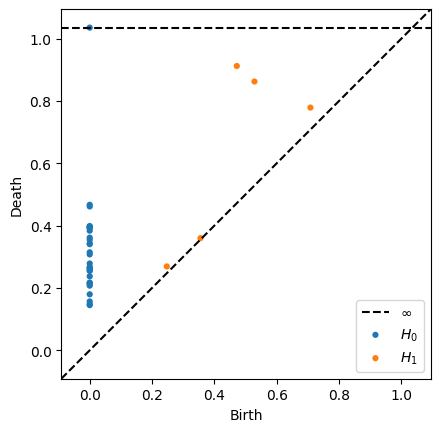

In [34]:
rips = Rips()
ripsdgms = rips.fit_transform(infty_pts)
rips.plot(ripsdgms)

### Comparing Persistence Diagrams

We can also plot both the Cech and Rips diagrams on the same plot:

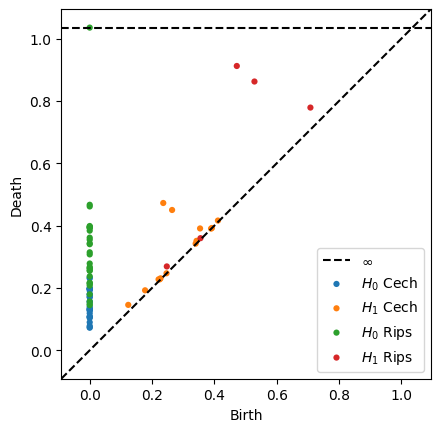

In [44]:
plot_diagrams(cechdgms + ripsdgms, labels = ['$H_0$ Cech', '$H_1$ Cech', '$H_0$ Rips', '$H_1$ Rips'])

There are big differences! How can we measure exactly these? 
**Answer**: One option is to use the bottleneck distance